# **DATA MINING**
#### Student: SAMUEL_BAIDOO

## Brief summary of document
This coding snippets seek to illustrates and evaluate an applied data mining activity on a real-world data with high dimension. The data mining processes comprise exploratory data analysis (EDA) deemed as “..an attitude or philosophy about how data analysis should be carried out..[1]”, data pre-processing (DPP) feature engineering, feature selection, modelling, derivation of conclusion and recommendations. The data to be used for the project contains an “epitopes for Trypanosoma cruzi (T. cruzi), a parasite that is transmitted through insect bites and brings about a Chagas’ disease”. A team at the Aston University, Birmingham created the above dataset through data consolidation and parsing from various online databases.

## Exploratory Data Analysis and Data Pre-processing
 - Exploratory data analysis (EDA) is a strategic analysis of data that emphasizes discovery or exploration of data while    maintaining an open mind to alternative possibilities [1].

In [29]:
# Installation of relevant libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve, log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, accuracy_score
from sklearn.ensemble import IsolationForest
import pyod
from pyod.models.abod import ABOD
from sklearn.decomposition import PCA
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
pd.options.display.max_columns = 100
import os
import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load the dataset
df = pd.read_csv("df_reduced.csv", delimiter = ';')
df.head(10)

,Info_PepID,Info_organism_id,Info_protein_id,Info_pos,Info_AA,Info_epitope_id,Info_nPos,Info_nNeg,Info_cluster,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,feat_esm1b_10,feat_esm1b_11,feat_esm1b_12,feat_esm1b_13,feat_esm1b_14,feat_esm1b_15,feat_esm1b_16,feat_esm1b_17,feat_esm1b_18,feat_esm1b_19,feat_esm1b_20,feat_esm1b_21,feat_esm1b_22,feat_esm1b_23,feat_esm1b_24,feat_esm1b_25,feat_esm1b_26,feat_esm1b_27,feat_esm1b_28,feat_esm1b_29,feat_esm1b_30,feat_esm1b_31,feat_esm1b_32,feat_esm1b_33,feat_esm1b_34,feat_esm1b_35,feat_esm1b_36,feat_esm1b_37,feat_esm1b_38,feat_esm1b_39,...,feat_esm1b_240,feat_esm1b_241,feat_esm1b_242,feat_esm1b_243,feat_esm1b_244,feat_esm1b_245,feat_esm1b_246,feat_esm1b_247,feat_esm1b_248,feat_esm1b_249,feat_esm1b_250,feat_esm1b_251,feat_esm1b_252,feat_esm1b_253,feat_esm1b_254,feat_esm1b_255,feat_esm1b_256,feat_esm1b_257,feat_esm1b_258,feat_esm1b_259,feat_esm1b_260,feat_esm1b_261,feat_esm1b_262,feat_esm1b_263,feat_esm1b_264,feat_esm1b_265,feat_esm1b_266,feat_esm1b_267,feat_esm1b_268,feat_esm1b_269,feat_esm1b_270,feat_esm1b_271,feat_esm1b_272,feat_esm1b_273,feat_esm1b_274,feat_esm1b_275,feat_esm1b_276,feat_esm1b_277,feat_esm1b_278,feat_esm1b_279,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
0,XP_815234.1:14,5693,XP_815234.1,283,S,406709,0,1,188,-1,-0.050457,0.350820,0.081111,0.292722,-0.046843,-0.316361,0.205464,-0.164362,-0.125390,-0.156784,0.045897,0.042131,-0.181123,0.436367,0.018117,0.280398,0.427437,-0.035554,0.109055,-0.131973,-0.062291,-0.135339,0.091819,-0.253493,0.115817,-0.312722,0.077823,-0.070992,0.206214,-0.158198,0.022381,-0.300536,0.604764,0.182287,0.122328,0.310104,0.153851,-0.262479,-0.271170,0.519772,...,0.046297,-0.298135,0.394000,-0.225248,0.114877,0.058563,-0.289925,0.069841,0.017693,0.522399,0.276783,-0.308652,-0.154333,-0.034036,-0.305461,-0.075398,0.129627,-0.168202,0.274903,0.150620,0.027789,0.119117,0.023642,0.224767,0.035848,-0.218988,-0.106919,0.004580,0.307539,0.060956,0.096095,-0.007834,0.146960,0.225542,0.377543,0.064284,-0.331888,-0.113188,0.306135,0.147041,0.416813,-0.143011,0.022861,-0.317150,0.231682,0.185963,-0.161442,-0.104047,0.207374,0.247171
1,XP_811525.1:1,5693,XP_811525.1,9,L,339305,0,1,32,-1,0.200686,-0.200323,-0.367348,-0.286893,-0.289697,-0.061222,-0.441129,0.103984,-0.336376,-0.232301,-0.354911,-0.062624,-0.050596,-0.234494,0.152959,0.325766,0.911585,-0.038300,0.063659,-0.243009,0.063168,0.028949,0.363523,0.306337,0.258719,-0.352666,0.235772,0.008064,0.205858,-0.382600,0.733396,-0.701703,0.123388,0.453314,0.174644,-0.065433,-0.265253,-0.229895,0.042705,0.028923,...,0.154067,-0.223283,0.002537,0.330692,-0.079759,0.124605,0.325710,-0.026328,-0.060914,0.565844,0.298729,0.019171,-0.179603,-0.205298,0.565073,0.088697,0.134401,-0.319568,0.034367,0.320271,0.329785,0.309391,-0.332305,0.099911,0.309837,0.036167,0.290742,0.088621,0.311715,0.374368,-0.242197,-0.355325,-0.183053,-0.348150,-0.133911,0.080735,0.011858,-0.307013,0.081736,0.771306,-0.322140,0.269885,-0.102179,0.325600,-0.145979,-0.010875,0.004623,-0.125649,-0.124625,-0.625465
2,XP_819902.1:4,5693,XP_819902.1,96,G,295341,0,1,64,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,-0.405301,-0.347159,-0.206172,-0.186397,0.092649,0.255869,-0.299405,0.222924,0.343041,0.081584,0.167793,-0.254511,0.542813,-0.254044,0.360677,0.200549,0.245334,-0.082343,-0.163432,0.132648,-0.104354,-0.224572,-0.081249,-0.307588,0.057957,-0.092422,-0.038397,0.063226,-0.076257,0.040426,-0.235604,-0.180189,...,-0.446886,-0.087080,-0.069001,0.444950,0.246103,-0.216336,0.081589,-0.017574,-0.033436,-0.034116,0.212782,-0.311518,0.141587,-0.100062,-0.133754,-0.042598,-0.126117,-0.122017,-0.367730,0.306911,-0.023042,-0.168653,-0.089852,0.086073,0.079107,-0.281869,0.070571,-0.052793,-0.454464,0.207870,0.031760,0.284209,0.108527,-0.0

# Understanding Data Types
- The DataFrame contains 12402 entries(rows) and 300 columns
- The variables haves 'Info_PepID' and 'feat_esm1b_289' as the first and the last columns respectively.
- 290 columns have 'float64' data types and 4 columns contain 'int64' data types, while 6 columns are with 'object' data types.
- Data types with 'int64' and 'float64' contain numerical data and 'object' data types contain string or categorical data.
- The dataset has 299 columns with imbalances

In [31]:
info = df.info() # .info() gives number of entries, number of non-null items, and type of variables
print(info)
describe = df.describe() #Views statistical columns within the dataset
print(describe)
types = df.dtypes # Displaying types of data within our dataset
print(types)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Columns: 300 entries, Info_PepID to feat_esm1b_289
dtypes: float64(290), int64(4), object(6)
memory usage: 28.4+ MB
None
       Info_organism_id      Info_pos  Info_cluster         Class  \
count           12402.0  12402.000000  12402.000000  12402.000000   
mean             5693.0    446.806160    139.667634     -0.970005   
std                 0.0    648.570623     77.944928      0.243095   
min              5693.0      1.000000      7.000000     -1.000000   
25%              5693.0    126.000000     70.000000     -1.000000   
50%              5693.0    252.000000    145.000000     -1.000000   
75%              5693.0    456.000000    205.000000     -1.000000   
max              5693.0   4839.000000    283.000000      1.000000   

       feat_esm1b_0  feat_esm1b_1  feat_esm1b_2  feat_esm1b_3  feat_esm1b_4  \
count  12388.000000  12388.000000  12390.000000  12389.000000  12390.000000   
mean       0.040924    

In [32]:
# Check for duplicates
duplicates = df.duplicated()

# Count the number of duplicates
num_duplicates = duplicates.sum()
if num_duplicates > 0:
    print(f"There are {num_duplicates} duplicate rows in the dataset.")
    # Optionally, you can display the duplicate rows
    duplicate_rows = df[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("There are no duplicate rows in the dataset.")

There are no duplicate rows in the dataset.


In [33]:
df.nunique() # checking for several unique values in each column and the data description

Info_PepID           3882
Info_organism_id        1
Info_protein_id       407
Info_pos             1870
Info_AA                20
                    ...  
feat_esm1b_285      12386
feat_esm1b_286      12388
feat_esm1b_287      12388
feat_esm1b_288      12388
feat_esm1b_289      12387
Length: 300, dtype: int64

In [34]:
# Filter rows where 'Class' is not -1
class_counts = df[df['Class'] != -1]['Class'].value_counts()

# Display the counts of each class
print("Counts of each class (excluding -1):")
print(class_counts)

Counts of each class (excluding -1):
1    186
Name: Class, dtype: int64


In [35]:
class_balances = {}
imbalanced_columns = 0

# Iterate over each column in the DataFrame
for column in df.columns:
    # Calculate class balance for the current column
    class_balance = df[column].value_counts(normalize=True)
    # Store the class balance in the dictionary
    class_balances[column] = class_balance
    # Check if the class balance indicates an imbalance
    if len(class_balance) > 1:
        imbalanced_columns += 1

# Print the class imbalance for each column
for column, balance in class_balances.items():
    print(f"Class balance for column '{column}':")
    print(balance)
    print()

# Print the number of columns with imbalances
print(f"Number of columns with imbalances: {imbalanced_columns}")

Class balance for column 'Info_PepID':
XP_817061.1:10    0.001855
XP_820015.1:10    0.001693
XP_819176.1:6     0.001532
XP_808278.1:8     0.001371
XP_816520.1:18    0.001371
                    ...   
XP_808957.1:10    0.000081
XP_820639.1:3     0.000081
XP_815660.1:14    0.000081
XP_805214.1:4     0.000081
XP_817531.1:2     0.000081
Name: Info_PepID, Length: 3882, dtype: float64

Class balance for column 'Info_organism_id':
5693    1.0
Name: Info_organism_id, dtype: float64

Class balance for column 'Info_protein_id':
XP_816335.1    0.030156
XP_812097.1    0.024593
XP_812223.1    0.011772
XP_812323.1    0.009515
XP_822065.1    0.009273
                 ...   
XP_804663.1    0.000161
XP_806455.1    0.000161
XP_814558.1    0.000081
XP_806165.1    0.000081
XP_809396.1    0.000081
Name: Info_protein_id, Length: 407, dtype: float64

Class balance for column 'Info_pos':
84      0.003790
102     0.003145
87      0.002983
64      0.002983
134     0.002903
          ...   
1883    0.000081
349

In [36]:
# Class balance under each 'Info_cluster' 
class_balance = df['Info_cluster'].value_counts()

print("Class balance under each Info_cluster:")
print(class_balance)

Class balance under each Info_cluster:
205    374
154    305
153    208
211    196
44     183
      ... 
159      4
238      4
198      3
233      3
253      2
Name: Info_cluster, Length: 265, dtype: int64


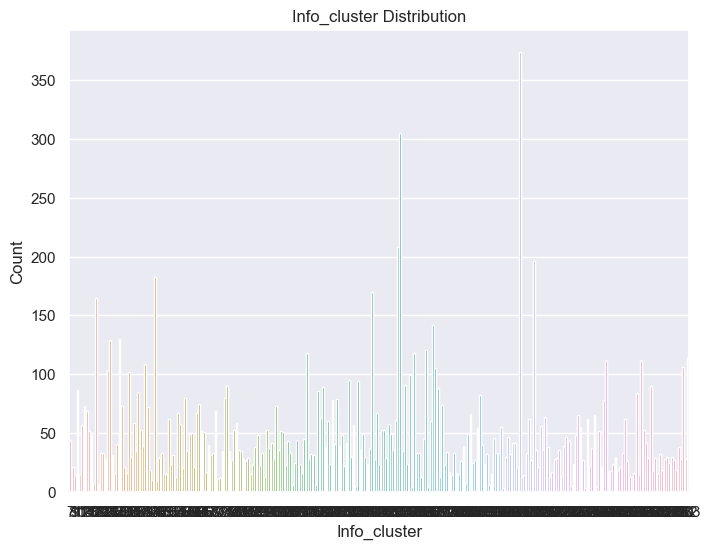

In [37]:
# Visualize class imbalance under each info_cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='Info_cluster', data=df)
plt.title('Info_cluster Distribution')
plt.xlabel('Info_cluster')
plt.ylabel('Count')
plt.show()

# Grouping of Data
- Data is grouped to prevent leakage
- Data is grouped into two; 80% for training and 20% for testing
- The 80% will be used for EDA process., pre-processing and predictive modelling
- The remaining 20% is for the final assessment of performance
- The grouping is structed by the 'Info_cluster' varaible

In [38]:

# Info' columns are prefixed with 'Info_' and features do not have this prefix
info_columns = [col for col in df.columns if col.startswith('Info_')]
feature_columns = [col for col in df.columns if not col.startswith('Info_')]

# Separate the Info variables and feature variables
df_info = df[info_columns]
df_features = df[feature_columns]

# Split the data into two chunks using GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_idx, test_idx in gss.split(df, groups=df['Info_cluster']):
    train_set = df.iloc[train_idx]
    test_set = df.iloc[test_idx]
    
# Drop 'Info' columns from both training and test sets
train_features = train_set.drop(info_columns, axis=1)
test_set = test_set.drop(info_columns, axis=1)

print(f"Training features shape after dropping 'Info' columns: {train_features.shape}")
print(f"Test features shape after dropping 'Info' columns: {test_set.shape}")




Training features shape after dropping 'Info' columns: (9809, 291)
Test features shape after dropping 'Info' columns: (2593, 291)


# Checking for missing Data
The column with the name 'feat_esm1b_148' has a huge percentage 90.1% of missing values.
The 'feat_esm1b_148 column seems not very useful for modelling and would therefore be removed from the data.

In [39]:

# checking for missing values in your training feature variables as follows:
missing_values_train_features = train_features.isnull().sum()
print("Missing values in training feature variables:")
print(missing_values_train_features)

Missing values in training feature variables:
Class              0
feat_esm1b_0      10
feat_esm1b_1      10
feat_esm1b_2       8
feat_esm1b_3      10
                  ..
feat_esm1b_285     9
feat_esm1b_286    10
feat_esm1b_287     9
feat_esm1b_288     9
feat_esm1b_289    10
Length: 291, dtype: int64


In [40]:
#Checking for missing values in the columns
def missing_values_table(train_features):
        # Total missing values
        mis_val = train_features.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * train_features.isnull().sum() / len(train_features)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(train_features.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing_values_table(train_features) #90% of missing values


Your selected dataframe has 291 columns.
There are 290 columns that have missing values.


,Missing Values,% of Total Values
feat_esm1b_148,8844,90.2
feat_esm1b_0,10,0.1
feat_esm1b_164,10,0.1
feat_esm1b_146,10,0.1
feat_esm1b_147,10,0.1
...,...,...
feat_esm1b_277,7,0.1
feat_esm1b_46,7,0.1
feat_esm1b_194,7,0.1
feat_esm1b_181,7,0.1


# Checking Numerical Features for outliers
- There are two pair of minima values and two pairs of maxima values

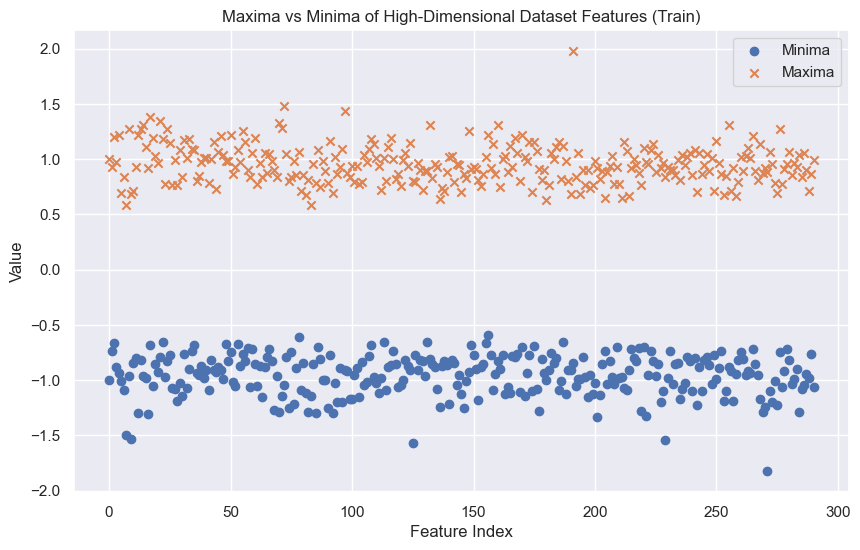

In [41]:
maxima_train = train_features.max()  # Get maxima for train_features
minima_train = train_features.min()  # Get minima for train_features

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(range(len(minima_train)), minima_train, label='Minima', marker='o')
plt.scatter(range(len(maxima_train)), maxima_train, label='Maxima', marker='x')
plt.title('Maxima vs Minima of High-Dimensional Dataset Features (Train)')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
# Checking the scale of numerical features
numerical_cols = train_features.select_dtypes(include=[np.number]).columns
variable_ranges = train_features[numerical_cols].max() - train_features[numerical_cols].min()
print("\nVariable Ranges:")
print(variable_ranges)


Variable Ranges:
Class             2.000000
feat_esm1b_0      1.664613
feat_esm1b_1      1.868110
feat_esm1b_2      1.852940
feat_esm1b_3      2.148488
                    ...   
feat_esm1b_285    2.101608
feat_esm1b_286    1.846388
feat_esm1b_287    1.691158
feat_esm1b_288    1.635316
feat_esm1b_289    2.052069
Length: 291, dtype: float64


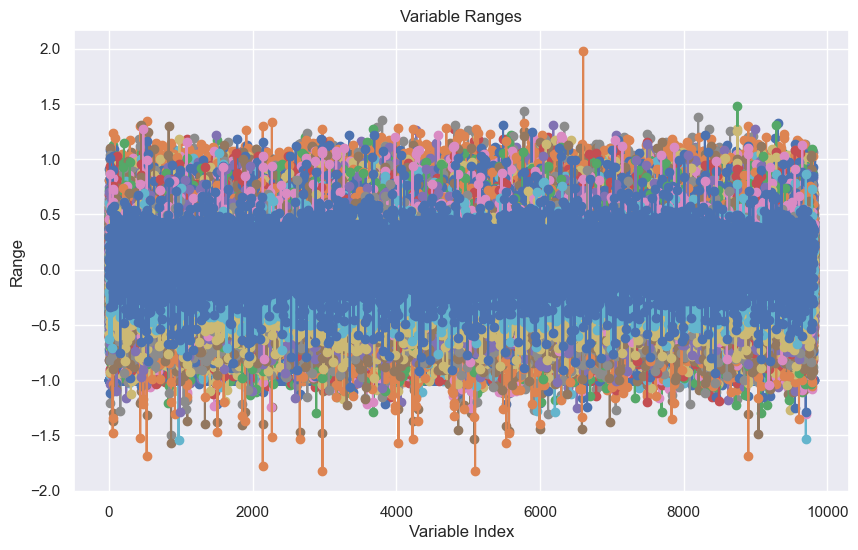

In [43]:
# Plotting maxima and minima of variables to identify any variables with significantly different scales
plt.figure(figsize=(10, 6))
plt.plot(train_features.values, marker='o', linestyle='-')
plt.title('Variable Ranges')
plt.xlabel('Variable Index')
plt.ylabel('Range')
plt.show()

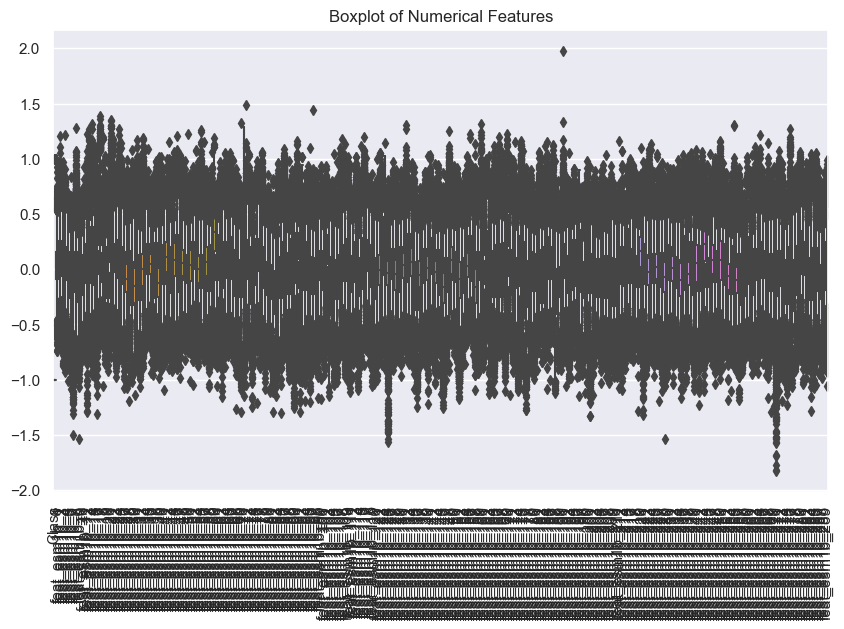

In [44]:
# Check numerical features for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_features[numerical_cols])
plt.title('Boxplot of Numerical Features')
plt.xticks(rotation=90)
plt.show()

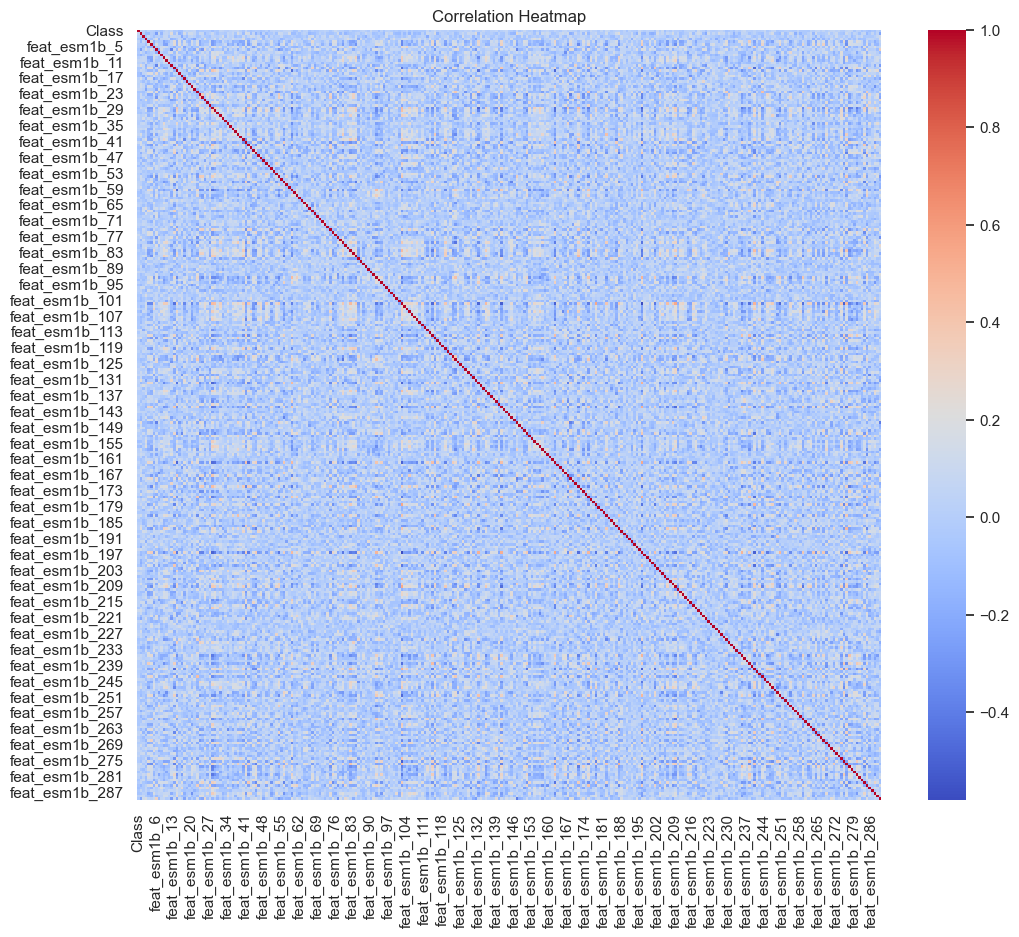

In [45]:
# Explore feature correlation
plt.figure(figsize=(12, 10))
sns.heatmap(train_features.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pre-processing #

# Dealing with missing values and outliers
- The column with the name 'feat_esm1b_148 has over 90% of missing values and will therefore be dropped
- The mean value of each column is being filled missing values in the DataFrame
- The rows with over 90% of missing values will be removed

In [46]:
#Dealing with missing values in the columns
#Removing a column with over 90% of missing values within the dataset
train_features = train_features.drop(['feat_esm1b_148'], axis=1) 
train_features.head()

,Class,feat_esm1b_0,feat_esm1b_1,feat_esm1b_2,feat_esm1b_3,feat_esm1b_4,feat_esm1b_5,feat_esm1b_6,feat_esm1b_7,feat_esm1b_8,feat_esm1b_9,feat_esm1b_10,feat_esm1b_11,feat_esm1b_12,feat_esm1b_13,feat_esm1b_14,feat_esm1b_15,feat_esm1b_16,feat_esm1b_17,feat_esm1b_18,feat_esm1b_19,feat_esm1b_20,feat_esm1b_21,feat_esm1b_22,feat_esm1b_23,feat_esm1b_24,feat_esm1b_25,feat_esm1b_26,feat_esm1b_27,feat_esm1b_28,feat_esm1b_29,feat_esm1b_30,feat_esm1b_31,feat_esm1b_32,feat_esm1b_33,feat_esm1b_34,feat_esm1b_35,feat_esm1b_36,feat_esm1b_37,feat_esm1b_38,feat_esm1b_39,feat_esm1b_40,feat_esm1b_41,feat_esm1b_42,feat_esm1b_43,feat_esm1b_44,feat_esm1b_45,feat_esm1b_46,feat_esm1b_47,feat_esm1b_48,...,feat_esm1b_240,feat_esm1b_241,feat_esm1b_242,feat_esm1b_243,feat_esm1b_244,feat_esm1b_245,feat_esm1b_246,feat_esm1b_247,feat_esm1b_248,feat_esm1b_249,feat_esm1b_250,feat_esm1b_251,feat_esm1b_252,feat_esm1b_253,feat_esm1b_254,feat_esm1b_255,feat_esm1b_256,feat_esm1b_257,feat_esm1b_258,feat_esm1b_259,feat_esm1b_260,feat_esm1b_261,feat_esm1b_262,feat_esm1b_263,feat_esm1b_264,feat_esm1b_265,feat_esm1b_266,feat_esm1b_267,feat_esm1b_268,feat_esm1b_269,feat_esm1b_270,feat_esm1b_271,feat_esm1b_272,feat_esm1b_273,feat_esm1b_274,feat_esm1b_275,feat_esm1b_276,feat_esm1b_277,feat_esm1b_278,feat_esm1b_279,feat_esm1b_280,feat_esm1b_281,feat_esm1b_282,feat_esm1b_283,feat_esm1b_284,feat_esm1b_285,feat_esm1b_286,feat_esm1b_287,feat_esm1b_288,feat_esm1b_289
2,-1,0.089208,0.074643,0.005332,0.304287,-0.093382,-0.150377,-0.202398,-0.302996,-0.405301,-0.347159,-0.206172,-0.186397,0.092649,0.255869,-0.299405,0.222924,0.343041,0.081584,0.167793,-0.254511,0.542813,-0.254044,0.360677,0.200549,0.245334,-0.082343,-0.163432,0.132648,-0.104354,-0.224572,-0.081249,-0.307588,0.057957,-0.092422,-0.038397,0.063226,-0.076257,0.040426,-0.235604,-0.180189,0.053146,0.279161,-0.058452,-0.314517,0.024127,0.245788,-0.156572,0.240371,-0.007445,...,-0.446886,-0.087080,-0.069001,0.444950,0.246103,-0.216336,0.081589,-0.017574,-0.033436,-0.034116,0.212782,-0.311518,0.141587,-0.100062,-0.133754,-0.042598,-0.126117,-0.122017,-0.367730,0.306911,-0.023042,-0.168653,-0.089852,0.086073,0.079107,-0.281869,0.070571,-0.052793,-0.454464,0.207870,0.031760,0.284209,0.108527,-0.001080,-0.816871,0.170516,-0.112051,-0.188503,0.164537,-0.093014,0.267216,-0.120633,-0.012753,-0.533533,-0.077836,-0.115498,-0.234221,-0.578971,-0.195853,0.008974
3,-1,0.150502,0.247198,0.155206,0.029653,0.117658,-0.185720,-0.206774,0.056524,-0.077987,0.028505,0.168280,0.121286,0.194161,0.252949,0.235666,0.187487,0.460890,0.403421,0.069117,-0.217844,0.196461,-0.116849,-0.032554,0.150692,0.071748,-0.117284,0.076455,-0.048411,0.148477,0.199066,0.025055,-0.075854,0.204653,0.126524,0.298804,0.025400,-0.129022,0.109864,-0.184091,0.115364,0.050408,-0.005079,0.007626,-0.263594,0.051343,0.225935,0.073794,-0.232982,0.025499,...,0.093993,-0.283098,0.226611,-0.046374,-0.152292,-0.070996,0.165977,-0.176264,0.049760,0.020535,0.009137,0.232013,-0.397168,-0.251852,0.068368,-0.163996,-0.049836,-0.226611,0.061101,-0.027246,0.001362,-0.060707,0.324214,-0.067727,0.004040,0.007365,0.079688,0.015448,-0.150069,-0.083490,-0.133525,-0.296910,0.170748,-0.010136,-0.060212,-0.009796,0.063876,-0.258043,-0.112874,0.111028,-0.162871,0.244862,-0.060719,0.237254,-0.015220,0.459895,-0.082559,-0.041386,-0.011011,-0.045873
4,-1,0.247700,-0.045094,-0.017004,-0.282002,-0.001418,-0.162899,-0.159904,-0.414519,-0.513792,0.041919,-0.104361,0.459194,-0.068477,0.300847,-0.208766,-0.154046,0.405115,-0.153436,0.072138,-0.195075,0.144536,-0.105762,-0.072244,-0.058138,-0.503402,-0.063686,-0.395494,-0.070757,-0.253826,-0.129048,-0.315780,-0.110397,-0.309903,-0.050234,-0.129450,-0.048308,0.101061,-0.013549,-0.153631,-0.081198,-0.085561,0.252966,-0.173177,-0.325336,0.314334,-0.138243,-0.084262,-0.139553,0.008540,...,-0.088835,-0.086380,-0.071687,0.049747,0.034296,-0.121777,-0.120912,0.054877,0.061971,0.231481,-0.132432,-0.336864,-0.593425,-0.102758,0.254406,-0.069985,-0.170692,-0.018207

In [47]:
train_features = train_features.fillna(df.mean())
missing_values_table(train_features)

Your selected dataframe has 290 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


# Doublechecking for missing Data
- Columns and rows are now without missing data

In [48]:
#Cross checking again for missing values
# Check for missing values in columns
missing_values_columns = train_features.isnull().sum()
print("Missing Values in Columns:")
print(missing_values_columns)

# Check for missing values in rows
missing_values_rows = train_features.isnull().sum(axis=1)
print("Missing Values in Rows:")
print(missing_values_rows)

Missing Values in Columns:
Class             0
feat_esm1b_0      0
feat_esm1b_1      0
feat_esm1b_2      0
feat_esm1b_3      0
                 ..
feat_esm1b_285    0
feat_esm1b_286    0
feat_esm1b_287    0
feat_esm1b_288    0
feat_esm1b_289    0
Length: 290, dtype: int64
Missing Values in Rows:
2        0
3        0
4        0
5        0
7        0
        ..
12397    0
12398    0
12399    0
12400    0
12401    0
Length: 9809, dtype: int64


In [49]:
# Identify outliers in the training dataset
iso = IsolationForest(contamination=0.1)
treat_outlier = iso.fit_predict(train_features)

# Select all rows that are not outliers
mask = treat_outlier != -1
train_features = train_features[mask]

# Summarize the shape of the filtered training dataset
print("Shape of new_df (filtered features):", train_features.shape)

Shape of new_df (filtered features): (8828, 290)


In [50]:
# Assuming 'target' is the name of your target variable column
target_variable = 'Class'

# Separate the target variable from the training features
train_target = train_features[target_variable]
train_features = train_features.drop(target_variable, axis=1)

## Addressing class imbalance
- Samples weights are calculated based on class labels
- Class weights are assigned inversely proporional to input data to balance the weights of less frequent classes
- Each class label is paired with a corresponding sample weight
[_If your chosen way to treat class imbalance was a pre-processing strategy such as under/over sampling or SMOTE, you can document it here. If it was a model-based strategy such as cost-based classification, you can document it together with your models_]

In [51]:


# Set LOKY_MAX_CPU_COUNT to the number of cores you want to use
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Replace '4' with the number of cores on your machine


from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to your training features and target
X_train_smote, y_train_smote = smote.fit_resample(train_features, train_target)


# Scaling the Data

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your training data
scaler.fit(train_features)

# Transform both the training and testing data
train_features = scaler.transform(train_features)

## Feature reduction


In [65]:
# Initialize PCA
pca = PCA(n_components=0.95)  # Preserve 95% of the variance

# Fit PCA on training data
X_train_pca = pca.fit_transform(train_features)

# Get the number of principal components
n_components = pca.n_components_

In [66]:
# Convert numpy arrays to pandas DataFrames
train_features_df = pd.DataFrame(train_features, columns=None)  
train_target_df = pd.DataFrame(train_target, columns=None)  
train_info_cluster_df = pd.DataFrame(train_info_cluster, columns=['Info_cluster'])  

# Identify the common indices across train_features, train_target, and train_info_cluster
common_indices = (
    pd.Index(train_features_df.index)
    .intersection(train_target_df.index)
    .intersection(train_info_cluster_df.index)
)

# Filter train_features, train_target, and train_info_cluster to include only the common indices
train_features_df = train_features_df.loc[common_indices]
train_target_df = train_target_df.loc[common_indices]
train_info_cluster_df = train_info_cluster_df.loc[common_indices]

# Convert back to numpy arrays if needed
train_features = train_features_df.to_numpy()
train_target = train_target_df.to_numpy().ravel()  # Convert to 1D array
train_info_cluster = train_info_cluster_df.to_numpy().ravel()  # Convert to 1D array

# Now you can proceed with the GroupKFold splitting
group_kfold = GroupKFold(n_splits=5)

for train_index, test_index in group_kfold.split(train_features, train_target, groups=train_info_cluster):
    # Split the data into train and test sets for this fold
    X_train_fold, X_test_fold = train_features[train_index], train_features[test_index]
    y_train_fold, y_test_fold = train_target[train_index], train_target[test_index]

    # Ensure train_info_cluster matches the number of samples in train_features
    processed_indices = train_info_cluster[train_index]
    train_info_cluster_processed = train_info_cluster[processed_indices]

    # Train the Logistic Regression model
    logistic_regression.fit(X_train_fold, y_train_fold)
    # Make predictions on the test set
    y_pred_lr = logistic_regression.predict(X_test_fold)
    # Evaluate the Logistic Regression model
    logistic_regression_metrics['accuracy'].append(accuracy_score(y_test_fold, y_pred_lr))
    logistic_regression_metrics['recall'].append(recall_score(y_test_fold, y_pred_lr))
    logistic_regression_metrics['f1_score'].append(f1_score(y_test_fold, y_pred_lr))
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred_lr).ravel()
    logistic_regression_metrics['sensitivity'].append(tp / (tp + fn))
    logistic_regression_metrics['specificity'].append(tn / (tn + fp))
    
    # Train the RandomForest model
    random_forest.fit(X_train_fold, y_train_fold)
    # Make predictions on the test set
    y_pred_rf = random_forest.predict(X_test_fold)
    # Evaluate the RandomForest model
    random_forest_metrics['accuracy'].append(accuracy_score(y_test_fold, y_pred_rf))
    random_forest_metrics['recall'].append(recall_score(y_test_fold, y_pred_rf))
    random_forest_metrics['f1_score'].append(f1_score(y_test_fold, y_pred_rf))
    tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred_rf).ravel()
    random_forest_metrics['sensitivity'].append(tp / (tp + fn))
    random_forest_metrics['specificity'].append(tn / (tn + fp))

# Compute the average performance metrics for Logistic Regression
average_lr_metrics = {metric: np.mean(values) for metric, values in logistic_regression_metrics.items()}
# Compute the average performance metrics for Random Forest
average_rf_metrics = {metric: np.mean(values) for metric, values in random_forest_metrics.items()}

# Print the average performance metrics for Logistic Regression
print("Logistic Regression Metrics:")
for metric, value in average_lr_metrics.items():
    print(f"Average {metric.capitalize()}: {value}")

# Print the average performance metrics for Random Forest
print("\nRandom Forest Metrics:")
for metric, value in average_rf_metrics.items():
    print(f"Average {metric.capitalize()}: {value}")


Logistic Regression Metrics:
Average Accuracy: 0.4764437856829161
Average Recall: 0.7399600399600399
Average F1_score: 0.6041485460743573
Average Sensitivity: 0.7399600399600399
Average Specificity: 0.19883116883116883

Random Forest Metrics:
Average Accuracy: 0.36000023527197433
Average Recall: 0.4898060273060273
Average F1_score: 0.45092170377296237
Average Sensitivity: 0.4898060273060273
Average Specificity: 0.20191558441558444


## Model fitting
[_Add your code blocks below related to your modelling approach(es). If you tested multiple models before choosing a final one, show it in code blocks below. If your strategy to deal with imbalanced classes was a modelling one such as cost-sensitive classification, then show it here as well._]

In [67]:
# Create Logistic Regression Classifier
classifier = LogisticRegression(solver='lbfgs')
classifier
classifier.fit(train_features, train_target)

LogisticRegression()

In [68]:
predicted_lr = classifier.predict(train_features)
print(predicted_lr)

[1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1]


## Consolidate the Data Mining Pipeline 
Initially, the training features and target variables are assigned. Subsequently, preprocessing steps involving scaling and dimensionality reduction (using MinMaxScaler and PCA) are defined, followed by the instantiation of a logistic regression classifier. These components are integrated into a single pipeline. After fitting the pipeline to the training data, holdout data is loaded from a CSV file. The holdout dataset is assumed to have 'Info' columns prefixed with 'Info_' and features without this prefix. The Info and feature variables are separated accordingly. Finally, predictions are made on the holdout data using the trained pipeline, and the predictions are saved to a CSV file named 'df_reduced_holdout.csv'.

In [75]:
X_train = train_features
y_train = train_target

# Define the preprocessing steps and the classifier
preprocessing_steps = Pipeline([
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components))
])

classifier = LogisticRegression()

# Combine preprocessing steps and the classifier into one pipeline
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessing_steps),
    ('classifier', classifier)
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Load the hold-out data
holdout_data = pd.read_csv('df_reduced_holdout.csv', delimiter=';')

# Assume 'Info' columns are prefixed with 'Info_' and features do not have this prefix
info_columns = [col for col in holdout_data.columns if col.startswith('Info_')]
feature_columns = [col for col in holdout_data.columns if not col.startswith('Info_')]

# Separate the Info variables and feature variables
df_info = holdout_data[info_columns]
features = holdout_data[feature_columns]

holdout_predictions = pipeline.predict(train_features)

# Save the predictions to a CSV file
pd.DataFrame(holdout_predictions, columns=['Class']).to_csv('df_reduced_holdout.csv', index=False)

## References

[1] Yu CH. 2022.Data mining and exploration: From traditional statistics to modern data science. CRC Press.